In [7]:

import chess
import heapq
import copy

# Simple material evaluation
def evaluate_board(board):
    piece_values = {
        chess.PAWN: 1,
        chess.KNIGHT: 3,
        chess.BISHOP: 3,
        chess.ROOK: 5,
        chess.QUEEN: 9,
        chess.KING: 0
    }
    score = 0
    for piece_type in piece_values:
        score += len(board.pieces(piece_type, chess.WHITE)) * piece_values[piece_type]
        score -= len(board.pieces(piece_type, chess.BLACK)) * piece_values[piece_type]
    return score

# Beam search algorithm
def beam_search_chess(board, beam_width=3, depth_limit=2):
    beam = [(evaluate_board(board), [], board)]

    for depth in range(depth_limit):
        candidates = []

        for score, path, state in beam:
            if state.is_game_over():
                continue

            for move in state.legal_moves:
                new_board = state.copy()
                new_board.push(move)
                new_score = evaluate_board(new_board)
                new_path = path + [move]
                candidates.append((new_score, new_path, new_board))

        beam = heapq.nlargest(beam_width, candidates, key=lambda x: x[0])

        if not beam:
            break

    best_score, best_path, _ = max(beam, key=lambda x: x[0])
    return best_path, best_score

# Example usage
board = chess.Board()
path, score = beam_search_chess(board, beam_width=3, depth_limit=2)
print("Best Move Sequence:", [move.uci() for move in path])
print("Evaluation Score:", score)



Best Move Sequence: ['g1h3', 'g8h6']
Evaluation Score: 0


In [6]:
import random
import math

# Distance between two points
def distance(p1, p2):
    return math.hypot(p1[0] - p2[0], p1[1] - p2[1])

# Total route distance
def total_distance(route):
    return sum(distance(route[i], route[i+1]) for i in range(len(route)-1)) + distance(route[-1], route[0])

# Swap two cities
def get_neighbors(route):
    neighbors = []
    for i in range(len(route)):
        for j in range(i+1, len(route)):
            new_route = route[:]
            new_route[i], new_route[j] = new_route[j], new_route[i]
            neighbors.append(new_route)
    return neighbors

# Hill Climbing Algorithm
def hill_climbing(locations):
    current_route = locations[:]
    random.shuffle(current_route)
    current_cost = total_distance(current_route)

    while True:
        neighbors = get_neighbors(current_route)
        best_neighbor = min(neighbors, key=total_distance)
        best_cost = total_distance(best_neighbor)

        if best_cost < current_cost:
            current_route = best_neighbor
            current_cost = best_cost
        else:
            break

    return current_route, current_cost

# Example usage
locations = [(0,0), (2,3), (5,5), (1,8), (7,3)]
route, cost = hill_climbing(locations)
print("Optimized Route:", route)
print("Total Distance:", round(cost, 2))


Optimized Route: [(7, 3), (5, 5), (1, 8), (2, 3), (0, 0)]
Total Distance: 24.15


Generation 0: Best Fitness = 0.00220, Distance = 455.51
Generation 1: Best Fitness = 0.00248, Distance = 402.52
Generation 2: Best Fitness = 0.00248, Distance = 402.52
Generation 3: Best Fitness = 0.00271, Distance = 369.19
Generation 4: Best Fitness = 0.00283, Distance = 353.59
Generation 5: Best Fitness = 0.00283, Distance = 353.59
Generation 6: Best Fitness = 0.00289, Distance = 346.58
Generation 7: Best Fitness = 0.00289, Distance = 346.58
Generation 8: Best Fitness = 0.00289, Distance = 346.58
Generation 9: Best Fitness = 0.00289, Distance = 346.58
Generation 10: Best Fitness = 0.00289, Distance = 346.58
Generation 11: Best Fitness = 0.00289, Distance = 346.58
Generation 12: Best Fitness = 0.00289, Distance = 346.58
Generation 13: Best Fitness = 0.00289, Distance = 346.58
Generation 14: Best Fitness = 0.00289, Distance = 346.58
Generation 15: Best Fitness = 0.00289, Distance = 346.58
Generation 16: Best Fitness = 0.00289, Distance = 346.58
Generation 17: Best Fitness = 0.00289, Di

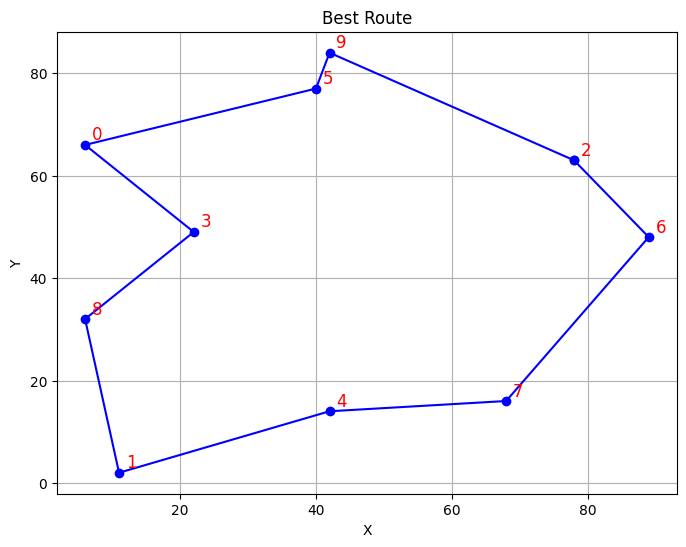

Generation 0: Best Fitness = 0.00210, Distance = 476.64
Generation 1: Best Fitness = 0.00255, Distance = 392.62
Generation 2: Best Fitness = 0.00221, Distance = 453.27
Generation 3: Best Fitness = 0.00232, Distance = 431.46
Generation 4: Best Fitness = 0.00229, Distance = 435.93
Generation 5: Best Fitness = 0.00229, Distance = 436.76
Generation 6: Best Fitness = 0.00238, Distance = 420.68
Generation 7: Best Fitness = 0.00243, Distance = 412.13
Generation 8: Best Fitness = 0.00243, Distance = 412.13
Generation 9: Best Fitness = 0.00243, Distance = 412.13
Generation 10: Best Fitness = 0.00243, Distance = 412.13
Generation 11: Best Fitness = 0.00243, Distance = 412.13
Generation 12: Best Fitness = 0.00243, Distance = 412.13
Generation 13: Best Fitness = 0.00248, Distance = 402.98
Generation 14: Best Fitness = 0.00252, Distance = 396.30
Generation 15: Best Fitness = 0.00243, Distance = 412.13
Generation 16: Best Fitness = 0.00246, Distance = 406.93
Generation 17: Best Fitness = 0.00246, Di

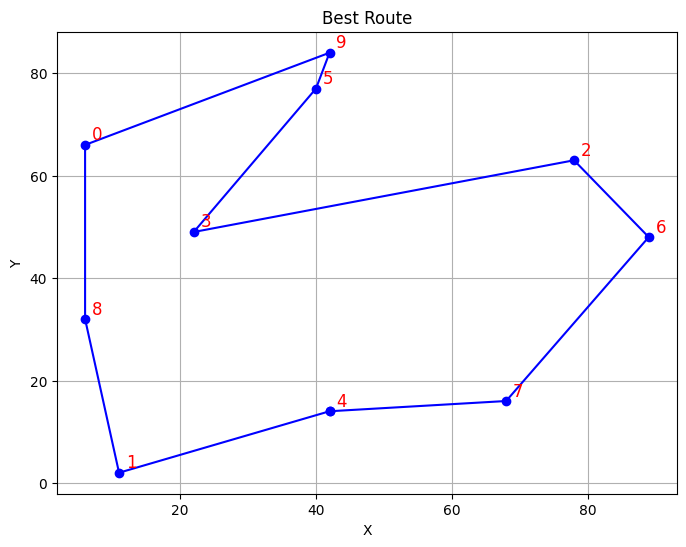

In [3]:
import random
import math
import matplotlib.pyplot as plt

# Randomly generate 10 cities with (x, y) coordinates
cities = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(10)]

# Distance between two cities
def distance(city1, city2):
    return math.hypot(city1[0] - city2[0], city1[1] - city2[1])

# Fitness function (1 / total distance) — higher is better
def calculate_fitness(route):
    total_dist = sum(distance(cities[route[i]], cities[route[(i+1) % len(route)]]) for i in range(len(route)))
    return 1 / total_dist

# Generate a random route (a permutation of city indices)
def create_random_route():
    return random.sample(range(len(cities)), len(cities))

# Select top 50% of population as parents
def select_parents(population, fitness_scores):
    sorted_population = [route for _, route in sorted(zip(fitness_scores, population), reverse=True)]
    return sorted_population[:len(population) // 2]

# Crossover using Order Crossover (OX)
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[start:end+1] = parent1[start:end+1]

    pointer = 0
    for city in parent2:
        if city not in child:
            while child[pointer] is not None:
                pointer += 1
            child[pointer] = city
    return child

# Mutation by swapping two cities
def mutate(route):
    idx1, idx2 = random.sample(range(len(route)), 2)
    route[idx1], route[idx2] = route[idx2], route[idx1]
    return route



# Run and plot the result
best_route, best_distance = genetic_algorithm()
print("\nBest Route:", best_route)
print(f"Total Distance: {best_distance:.2f}")
plot_route(best_route)

# Main Genetic Algorithm
def genetic_algorithm():
    population_size = 10
    population = [create_random_route() for _ in range(population_size)]
    best_fitness = 0
    generation = 0
    mutation_rate = 0.1
    max_generations = 100

    while best_fitness < 1.0 and generation < max_generations:
        fitness_scores = [calculate_fitness(ind) for ind in population]
        best_fitness = max(fitness_scores)
        print(f"Generation {generation}: Best Fitness = {best_fitness:.5f}, Distance = {1/best_fitness:.2f}")

        parents = select_parents(population, fitness_scores)
        new_population = []

        while len(new_population) < population_size:
            parent1, parent2 = random.sample(parents, 2)
            child = crossover(parent1, parent2)
            if random.random() < mutation_rate:
                child = mutate(child)
            new_population.append(child)

        population = new_population
        generation += 1

    best_individual = max(population, key=calculate_fitness)
    return best_individual, 1 / calculate_fitness(best_individual)

# Run and plot the result
best_route, best_distance = genetic_algorithm()
print("\nBest Route:", best_route)
print(f"Total Distance: {best_distance:.2f}")
plot_route(best_route)
